# Ch 04: Concept 02

## Logistic regression

라이브러리 import, hyper parameter 조정

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000

가상 데이터 생성

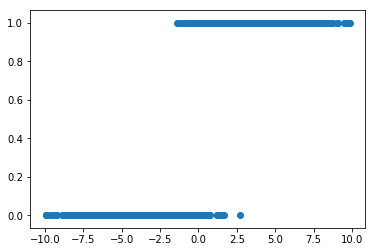

In [2]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

placeholder, variables, model, cost function, training op 생성

In [3]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

모델 train

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        if epoch % 10 == 0:
            print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})

0 0.693146
10 0.429464
20 0.318061
30 0.259071
40 0.222702
50 0.197974
60 0.180008
70 0.16632
80 0.155515
90 0.146748
100 0.139477
110 0.133341
120 0.128083
130 0.123524
140 0.119528
150 0.115993
160 0.112841
170 0.110012
180 0.107456
190 0.105135
200 0.103016
210 0.101073
220 0.0992842
230 0.0976317
240 0.0960997
250 0.0946752
260 0.0933467
270 0.0921046
280 0.0909404
290 0.0898468
300 0.0888174


이제 우리의 모델이 얼마나 잘 맞는지 시각화를 해보자.

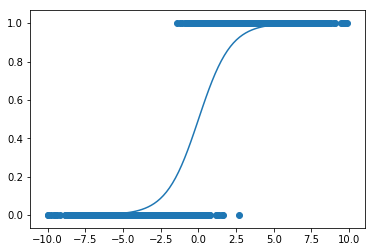

In [5]:
all_xs = np.linspace(-10, 10, 100)
with tf.Session() as sess:
    predicted_vals = sess.run(tf.sigmoid(all_xs * w_val[1] + w_val[0]))
plt.plot(all_xs, predicted_vals)
plt.scatter(xs, ys)
plt.show()

즉 이 시그모이드 곡선에서 y값이 0.5보다 크다면 1로 분류하고 0.5보다 작다면 0으로 분류하는 것이다.

linear regression classification에 비해서 왜곡된 선으로 인해 분류가 더 잘 이루어 진다.